# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

## Data Dictionary

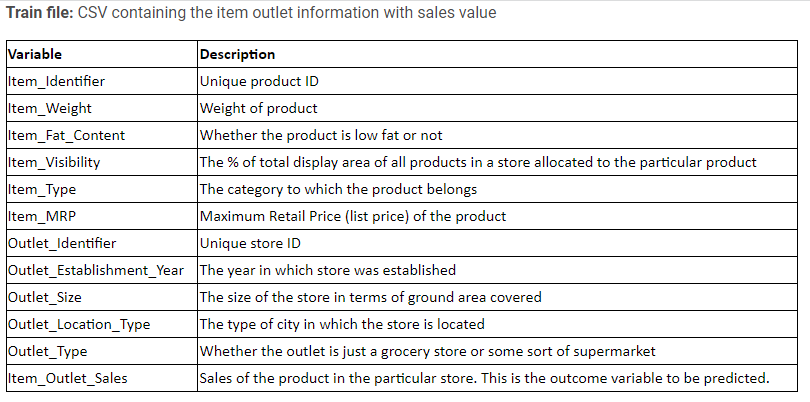

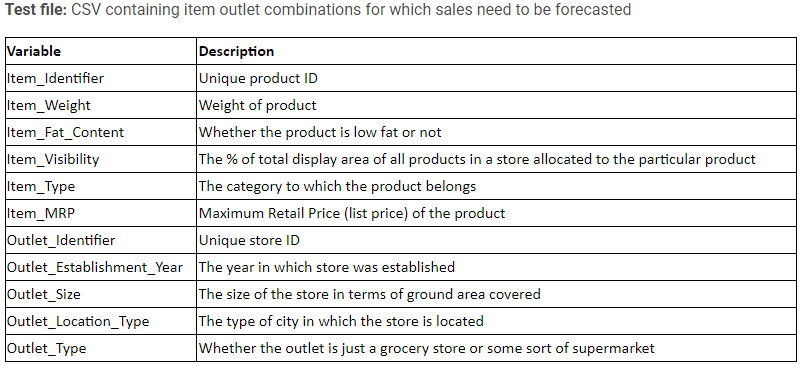

## Table of Content

1. **[Importing The Data](#import_data)**
2. **[Univariate Analysis](#univariate)**
3. **[Bivariate Analysis](#bivariate)**
4. **[Missing Values](#missing)**
5. **[Outlier Treatment](#outlier)**
6. **[Feature Engineering](#feature)**
7. **[Train Test Split](#split)**
8. **[Statistical Analysis](#statistic)**
9. **[Scaling/Transformation](#scaling)**
10. **[Encoding The Categorical Variables](#encoding)**
11. **[Model Building](#model)**

<a id="import_data"> </a>
## 1. Importing The Data

In [247]:
import numpy as np
import pandas as pd

# Visualization...
import matplotlib.pyplot as plt
import seaborn as sns

# warnings...
import warnings
warnings.filterwarnings("ignore")

# dataframe view..
pd.set_option('display.max_columns', 50)

from IPython import display

In [248]:
# train and test...
train = pd.read_csv("train_XnW6LSF.csv")
test = pd.read_csv("test_FewQE9B.csv")

In [249]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [250]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [251]:
# Shape of the Data
train.shape, test.shape

((8523, 12), (5681, 11))

In [252]:
# Combining the Data
combined = pd.concat([train, test], ignore_index = True)
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [253]:
combined.shape

(14204, 12)

In [254]:
# 5 Point Summary Statistics of the Data which includes total rows, Mean, standard deviation, and Median(50%)
combined.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

<a id="univariate"> </a>
## 2. Univariate Analysis

* Numerical Variables - Distplot
* Categorical Vars - Countplot / Frequency Plot

In [256]:
# Pulling Numerical Columns
num_cols = combined.select_dtypes(include = np.number).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [257]:
# Categorical Variables
combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [258]:
# Excluding Item_Identifier because it is an unrelevant column for univariate analysis
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

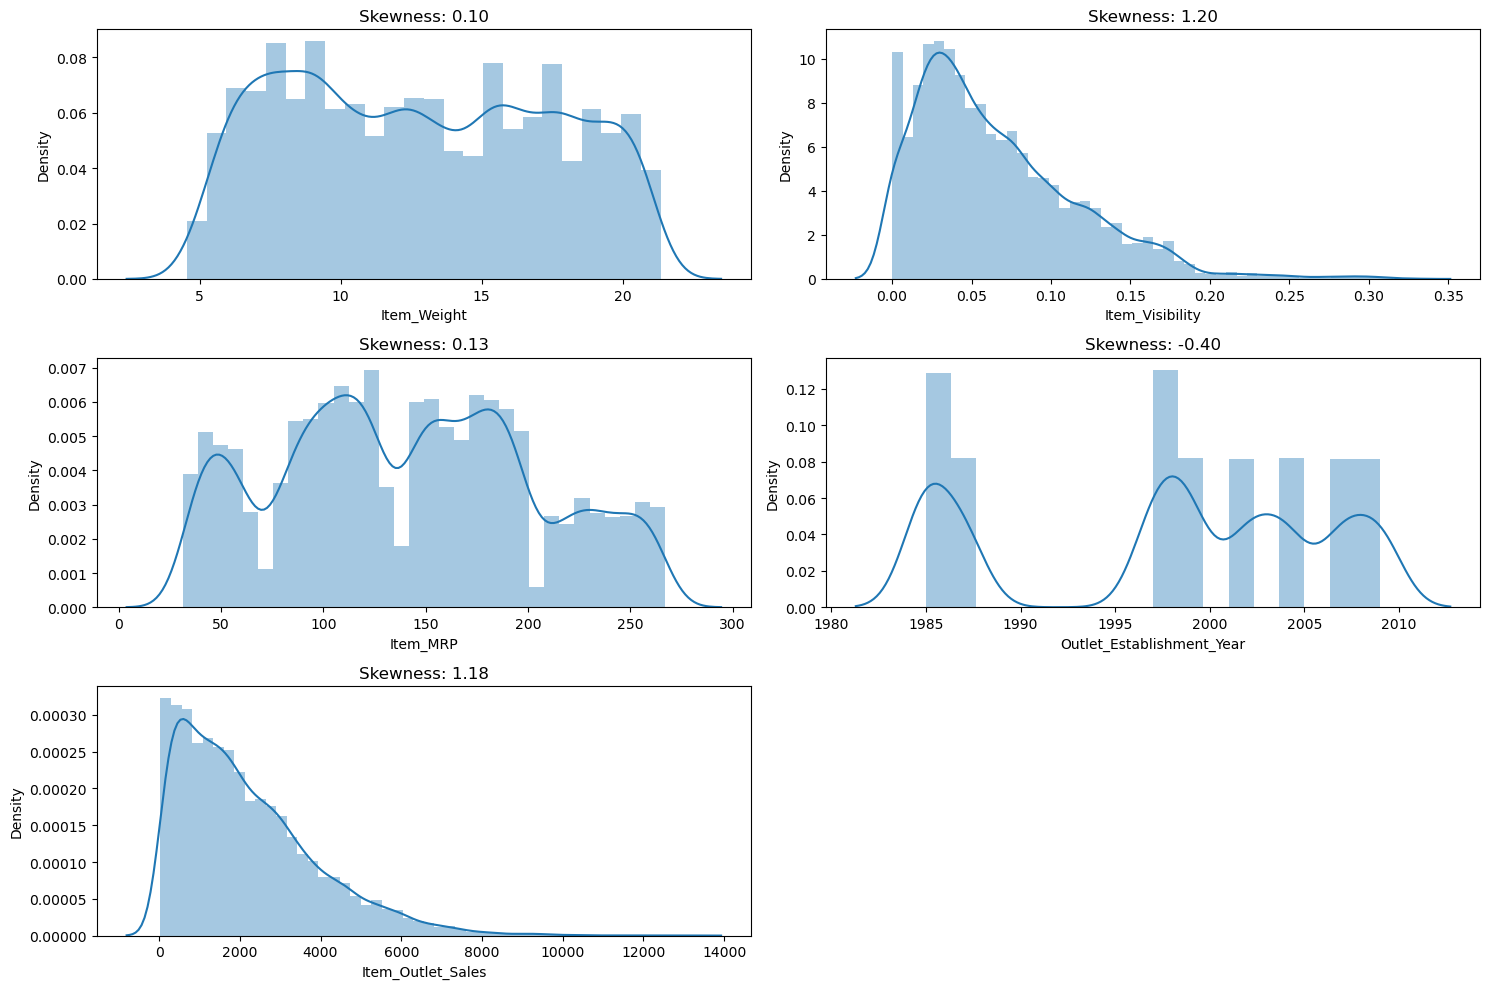

In [259]:
nrows = 3
ncols = 2
repeater = 1
plt.figure(figsize=(15, 10))

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:, i])
    plt.title('Skewness: %.2f'%combined[i].skew())
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

**Inference:**
* Target Variable (Sales) is highly Skewed in Nature. This means that there are products that have high pricing and at the same time, people are also buying those products.

* MRP seems to have Bimodal proprerty which means that there is no single pice that dominates or drives the sales. There are multiple price points that are the deciding factor of the Sales.

* Out Est Year is Categorical and therefore, no pattern in the Distplot...

* Item Weight, as we see is Uniform in Nature. It means that the item weight of all the products falls in a certain range giving a feel of Unformity.

* Item Visibility is skewed which means some products have a higher visibility than the rest.

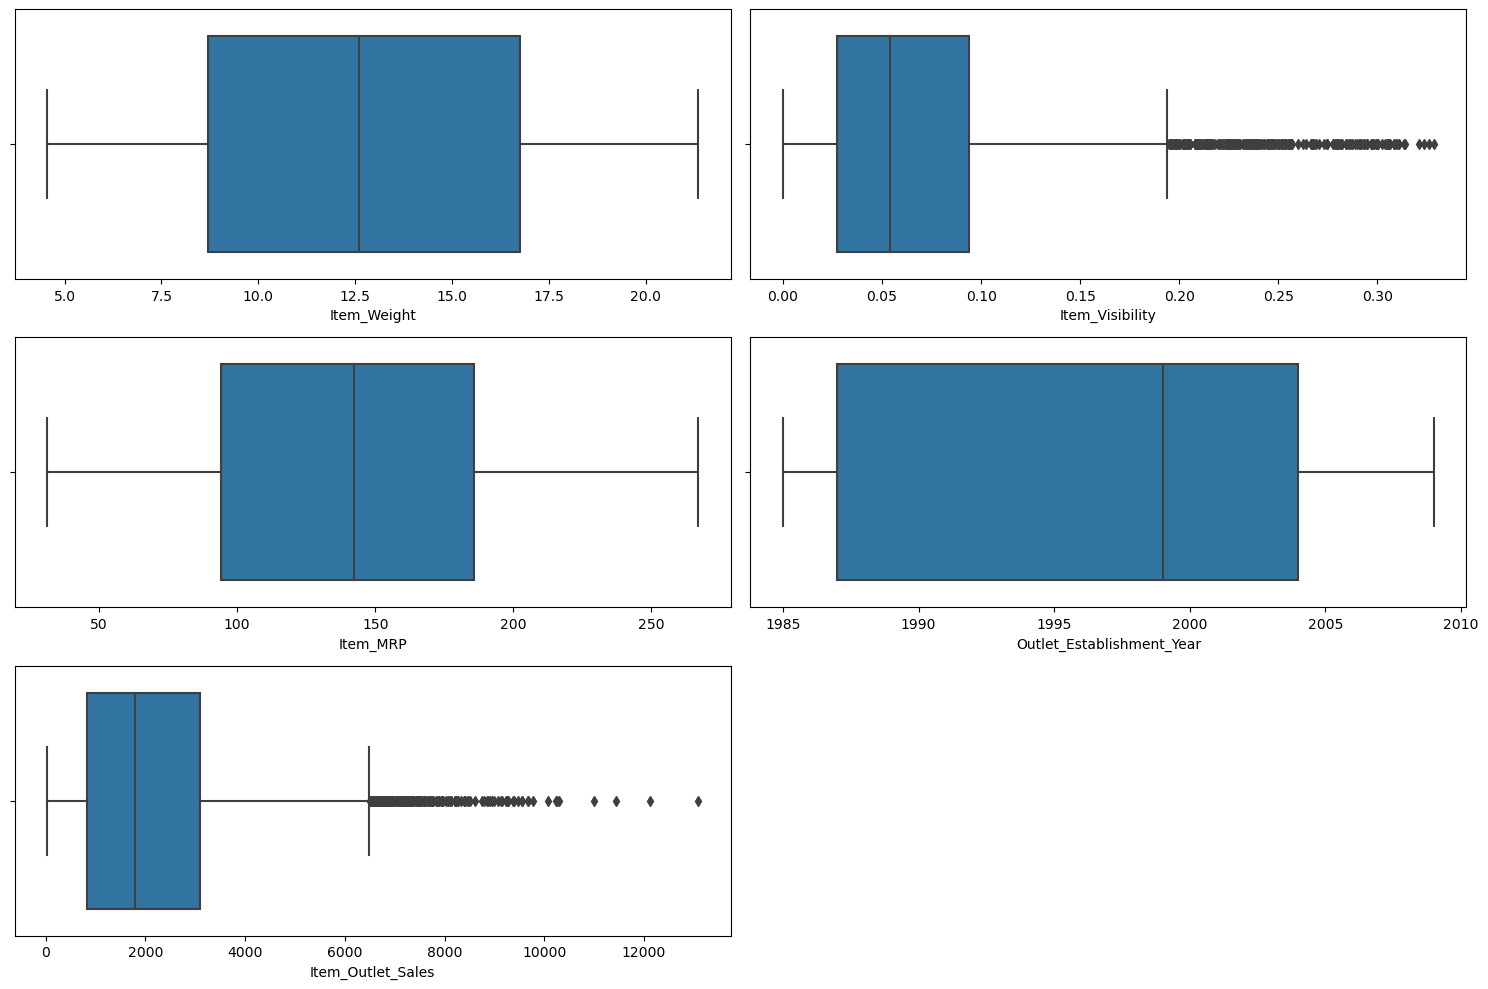

In [260]:
nrows = 3
ncols = 2
repeater = 1
plt.figure(figsize=(15, 10))

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(combined.loc[:, i])
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

Outliers are present in `Item_Visibility` and `Item_Outlet_Sales`.

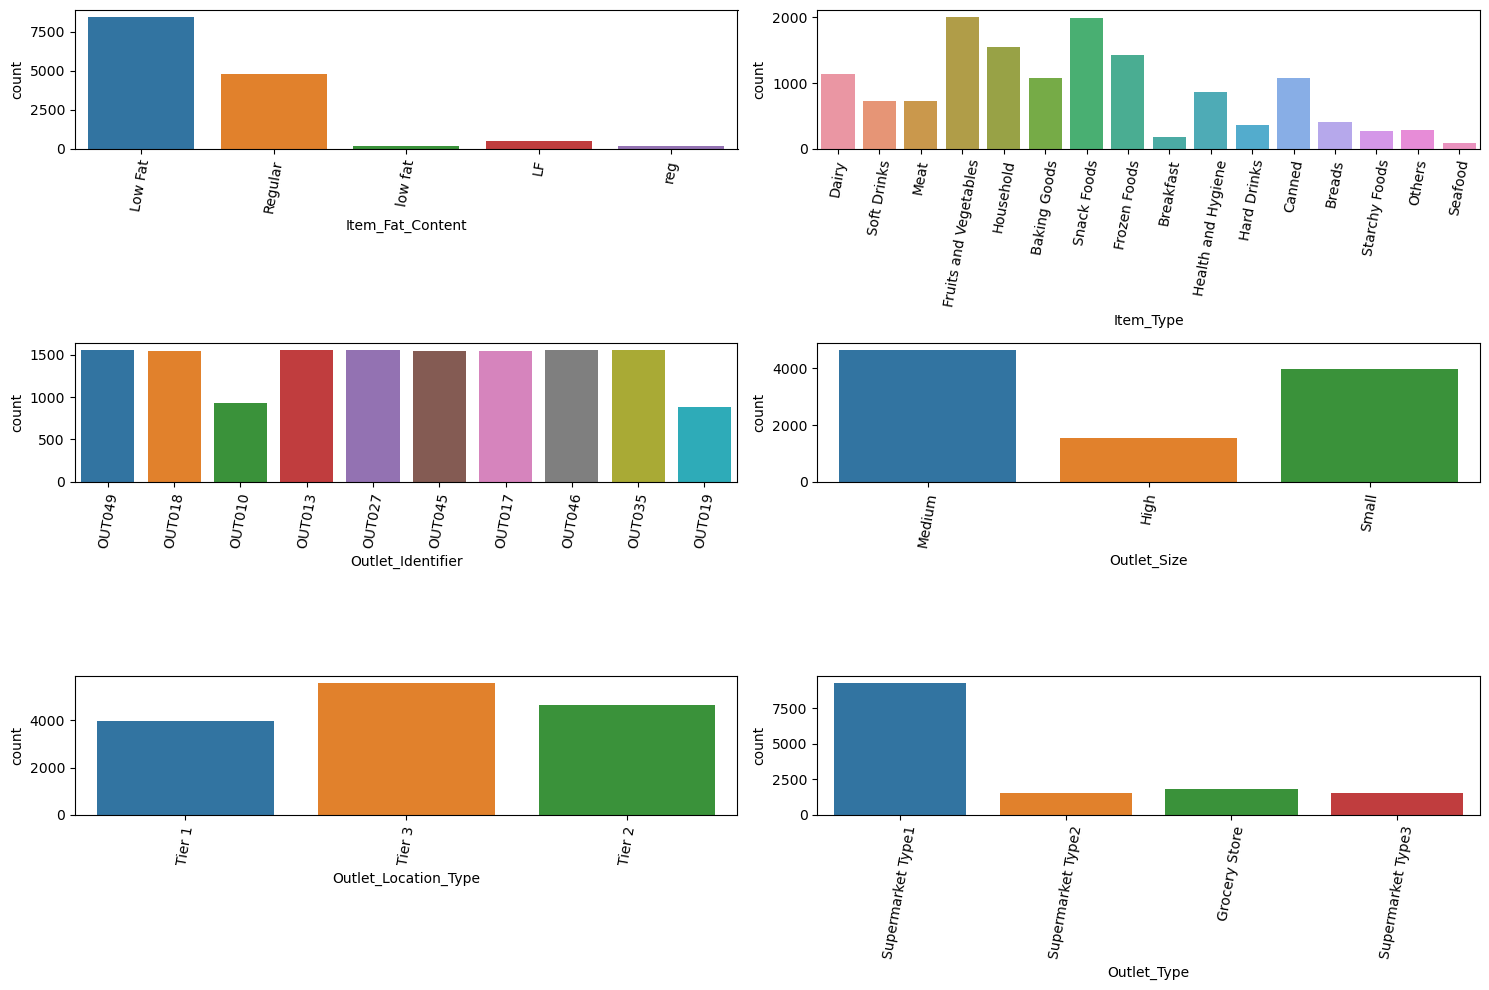

In [261]:
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize= (15, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    plt.xticks(rotation=80)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [262]:
# Item Type
print('Top 5 Items:', combined.Item_Type.value_counts()[:5].index)

Top 5 Items: Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy'],
      dtype='object')


<AxesSubplot:>

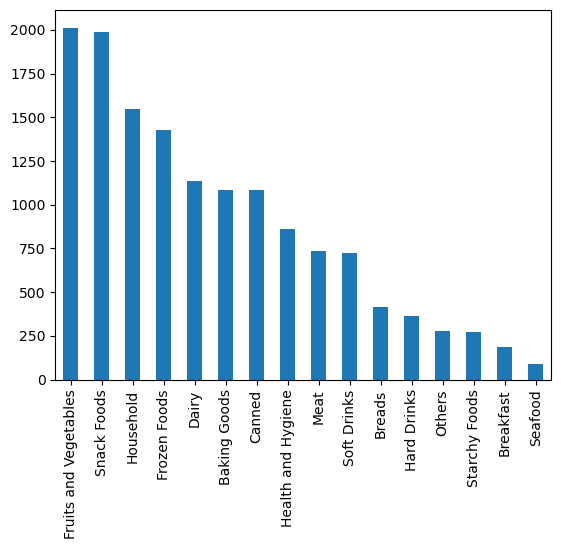

In [263]:
# Plot the Item Type
combined.Item_Type.value_counts().plot(kind='bar')

<AxesSubplot:>

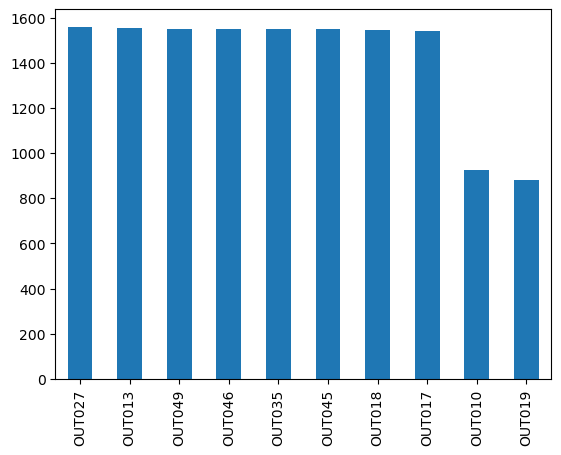

In [264]:
combined.Outlet_Identifier.value_counts().plot(kind='bar')

# Two Outlets having lowest frequency are OUT 10 and OUT 19

* Low fat Items have the highest demand.
* Top 5 Selling items are fruits & vegetables, snack foods, household, frozen foods and dairy products.
* Outlets 10 and 19 can be the least performing outlets as the count of these 2 is lowest as compared to the rest.
* Most of the outlets were of medium and small size.
* Most of the items were purchased from Supermarket type 1.

**errors**
* Item fat content needs to be treated because the same categories are wrongly entered.

In [265]:
# Fixing the Item Fat Content
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [266]:
combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF", "reg"],
                                 value = ["Low Fat", "Low Fat","Regular"],
                                 inplace = True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

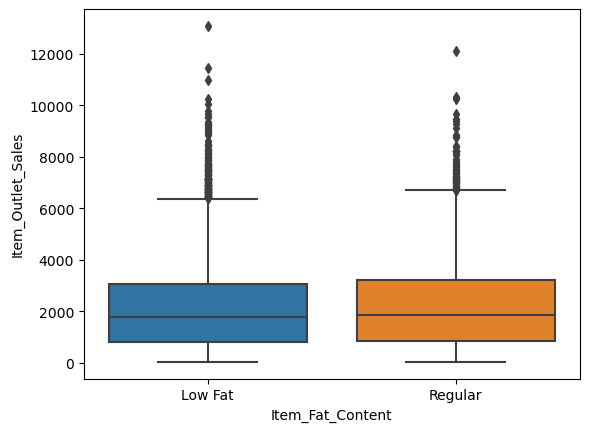

In [267]:
sns.boxplot(combined.Item_Fat_Content, 
           combined.Item_Outlet_Sales)

In [268]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<a id="bivariate"> </a>
## 2. Bivariate Analysis

* Num vs Num ~ Scatter Plot
* cat vs  num ~ Box Plot

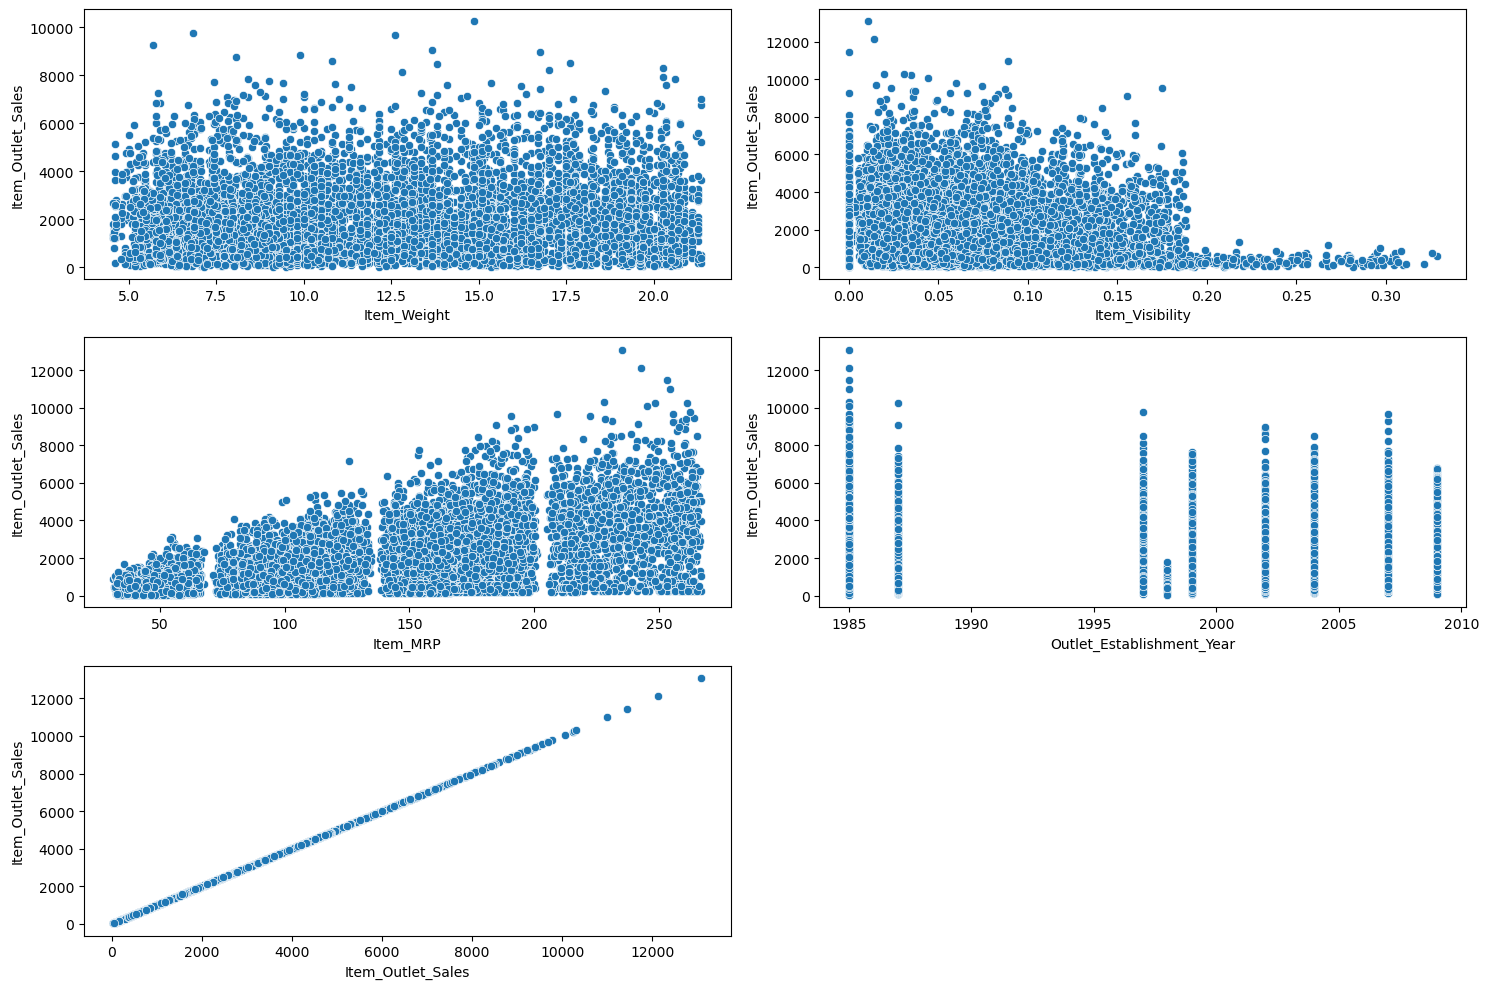

In [269]:
# Num vs Num
nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize=(15, 10))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:, i], combined.Item_Outlet_Sales)
    iterator+=1
    
plt.tight_layout()
plt.show()

* Item weight has no pattern with outlet sales. It means the correlation will also be very low.
* However, we see a strong pattern with MRP. This means that the MRP can be strong predictor of the target.
* Item visibility has a negative correlation with sales. As the visibility increases, sales go down.
* There are lot of 0 in item visibility.

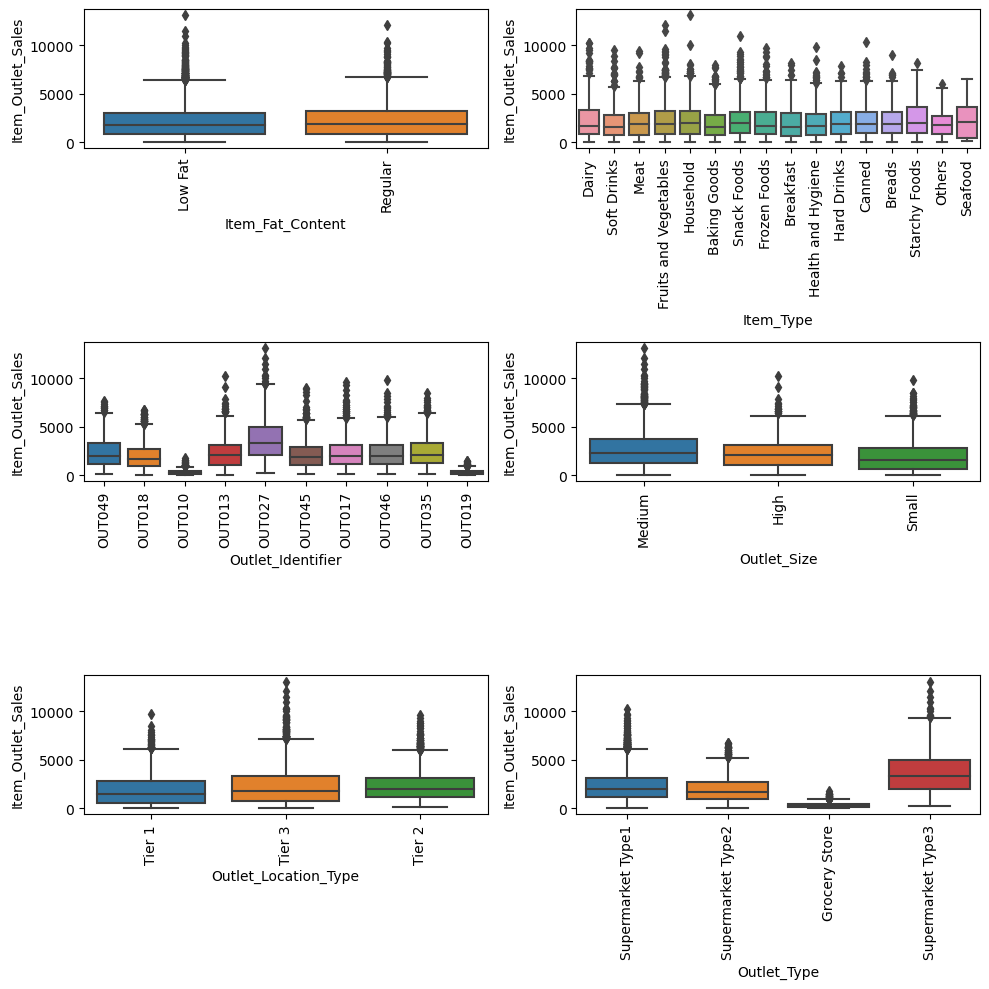

In [270]:
# Cat vs Num (Sales)
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize = (10, 10))

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], combined.loc[:, "Item_Outlet_Sales"])
    iterator+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

**Inference:**
* Tier 3 outlets have highest sales, followed by supermarket 3 and medium size outlets.
* The outlet ID that has the max sales is OUT 27.
* OUT27 & OUT13 are the best performing outlets and OUT 10 and OUT 19 are the least performing outlets
* Grocery store in outlet types have the lowest sales.
* The top 5 selling items have the highest sales.

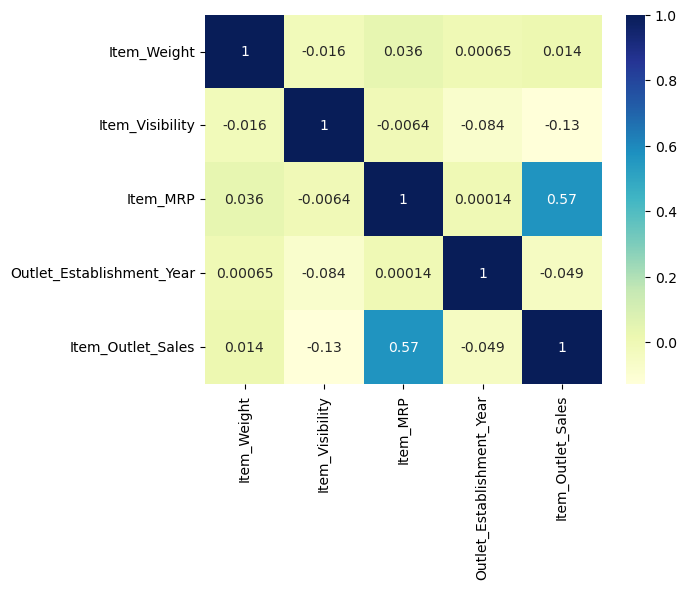

In [271]:
# Correlation between Numerical Variables
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

<a id="missing"> </a>
## 4. Missing Values

In [272]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [273]:
# Treating null values of Item weight with the mean of each Item Identifier that has missing values in Item weight
combined['Item_Weight']= combined.groupby('Item_Identifier')['Item_Weight']\
.apply(lambda x: x.fillna(x.mean()))

In [274]:
combined.Item_Weight.isnull().sum()

0

In [275]:
# Treating 0 values of Item visibility with the mean of each Item Identifier 
combined['Item_Visibility']= combined.groupby('Item_Identifier')['Item_Visibility']\
.apply(lambda x: x.replace(to_replace= 0, value= x.mean() ))

In [276]:
combined.Item_Identifier.isnull().sum()

0

In [277]:
# Null values of Item Size
combined[combined.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.088380,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [278]:
# Finding the Mode of the Outlet Size
combined.Outlet_Size.mode()[0]

'Medium'

In [279]:
# Outlet Types where the Outlet Size is Missing
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [280]:
# Outlets where the Outlet Size is Missing
combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [281]:
combined.loc[combined.Outlet_Size== 'Medium']['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT027'], dtype=object)

So, now I know that I **cannot impute medium** here because the Outlets for which the Size is missing is not of Medium type.

I also know one thing that **OUT010 is A Low Performing Outlet**

In [282]:
pd.DataFrame(combined.groupby("Outlet_Type")\
             ["Outlet_Size"].value_counts())

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                880
Supermarket Type1 Small               3100
                  High                1553
                  Medium              1550
Supermarket Type2 Medium              1546
Supermarket Type3 Medium              1559

In [283]:
# Imputing 'small' in outlet size where outlet type is grocery as all grocery store are small (as seen above)
combined.loc[(combined.Outlet_Type=="Grocery Store")&\
            (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [284]:
# Similarly Imputing 'small' in outlet size where outlet type is 'Supermarket Type1' becoz its mode is 'small'
combined.loc[(combined.Outlet_Type=="Supermarket Type1")&\
            (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [285]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<a id="outlier"> </a>
## 5. Outlier Treatment

* The presence of Outliers is defined by the Extreme Values that appear on the upper side of the Boxplot or on the lower end of the Boxplot.

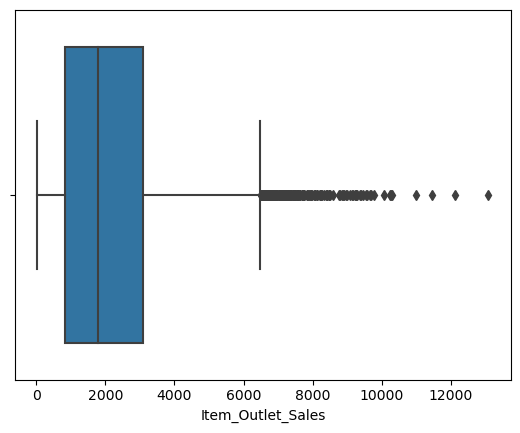

In [286]:
sns.boxplot(combined.loc[:, 'Item_Outlet_Sales'])
plt.show()

In [287]:
# Removing Outliers from the Item Outlet Sales
q1 = train.Item_Outlet_Sales.quantile(0.25)
q3 = train.Item_Outlet_Sales.quantile(0.75)
IQR = q3 - q1
print(f"Quantile1: {q1}")
print(f"Quantile3: {q3}")
print(f"IQR: {IQR}")

Quantile1: 834.2474
Quantile3: 3101.2964
IQR: 2267.049


In [288]:
# Calculating the Range Limits
upper_range = q3+1.5*IQR
lower_range = q1-1.5*IQR

print("Upper Range: ", upper_range)
print("Lower Range: ", lower_range)

Upper Range:  6501.8699
Lower Range:  -2566.3261


In [289]:
# removing the Outliers from train set

wt_outlier = train.loc[~((train.Item_Outlet_Sales>upper_range)| (train.Item_Outlet_Sales<lower_range))]

In [290]:
wt_outlier.shape

(8337, 12)

In [291]:
train.shape[0]- wt_outlier.shape[0]

186

In [292]:
wt_outlier.Item_Outlet_Sales.describe()

count    8337.000000
mean     2059.362844
std      1506.099754
min        33.290000
25%       810.944400
50%      1747.059200
75%      2998.097400
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales'>

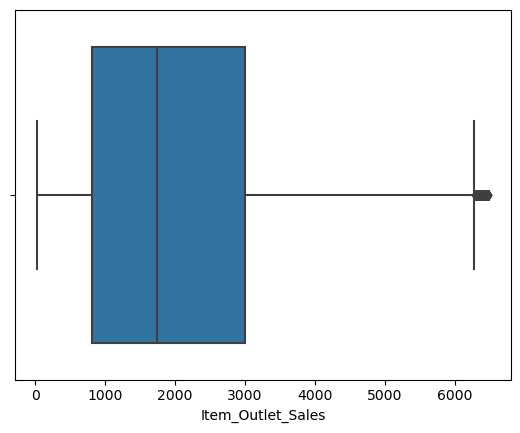

In [293]:
# Create the Boxplot
sns.boxplot(wt_outlier.Item_Outlet_Sales)

### Winsorization 

* It is a concept where the we cap the values. Capping the values means that the Outliers will be capped/maxed out to let say 0.95. It looks like trimming of the data from top and bottom selectively.

**Lets Apply Winsorization and See if it works**

In [294]:
from scipy.stats.mstats import winsorize

In [295]:
new= combined.copy()

for i in combined.columns:
    winsorized_data = winsorize(a = new.loc[:, i], limits=(0.01, 0.01))
    new[i+"_winsorized"] = winsorized_data

In [296]:
new.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_winsorized',
       'Item_Weight_winsorized', 'Item_Fat_Content_winsorized',
       'Item_Visibility_winsorized', 'Item_Type_winsorized',
       'Item_MRP_winsorized', 'Outlet_Identifier_winsorized',
       'Outlet_Establishment_Year_winsorized', 'Outlet_Size_winsorized',
       'Outlet_Location_Type_winsorized', 'Outlet_Type_winsorized',
       'Item_Outlet_Sales_winsorized'],
      dtype='object')

In [297]:
cols=[ 'Item_Weight_winsorized', 'Item_Visibility_winsorized',  'Item_MRP_winsorized', 'Item_Outlet_Sales_winsorized'] 

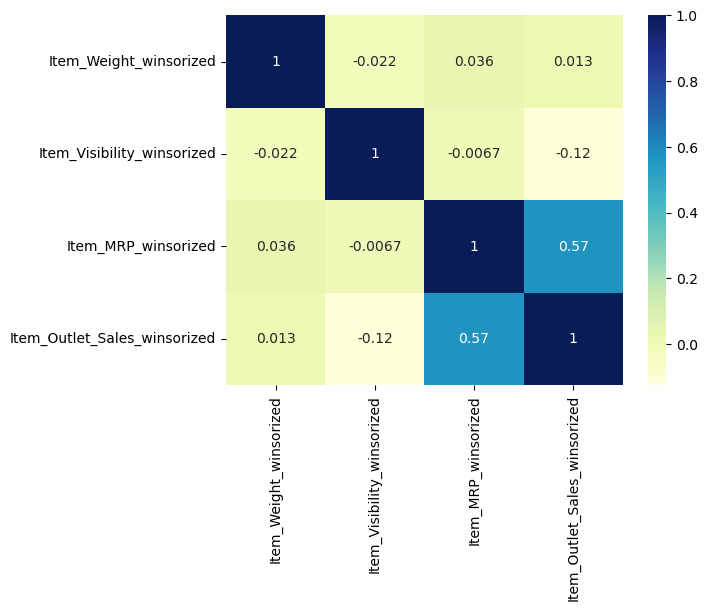

In [298]:
# Correlation between Numerical Variables
sns.heatmap(new.loc[:, cols].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Our Final Conclusion is that there is no change in the Correlation between Num Vars after Winsorization.

So, we will go with the Original Data without any change.

In [299]:
del new

In [300]:
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


<a id="feature"> </a>
## 6.Feature Engineering

In [301]:
len(combined.Item_Identifier.unique())

1559

In [302]:
# Extracted the First Two IDs of the Item Identifier
ids =[]

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [303]:
# Create a new feature named [ids] in the dataset
combined['Item_Ids'] = pd.Series(ids)

In [304]:
# where it is NC in Item IDs, we will replace 'Low Fat' to 'Non Edible' in Item Fat Content
combined.loc[(combined.Item_Ids=="NC") &  (combined.Item_Fat_Content== "Low Fat"), 'Item_Fat_Content'] = "Non Edible"

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

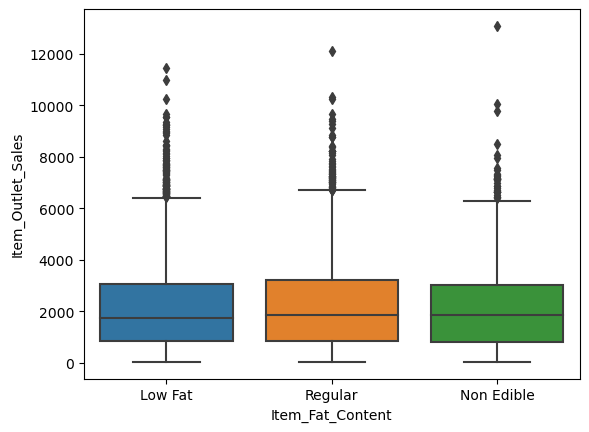

In [305]:
# Plot
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = combined)

In [306]:
 # Binning Item Type into perishable and non-perishable items
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [307]:
perishables = ["Dairy", "Meat", "Fruits and Vegetables",
             "Breakfast", "Breads", "Seafood"]

In [308]:
def perish(x):
    if x in perishables:
        return("Perishables")
    else:
        return("Non_Perishables")

In [309]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(perish)

<AxesSubplot:xlabel='Item_Type_Cat', ylabel='Item_Outlet_Sales'>

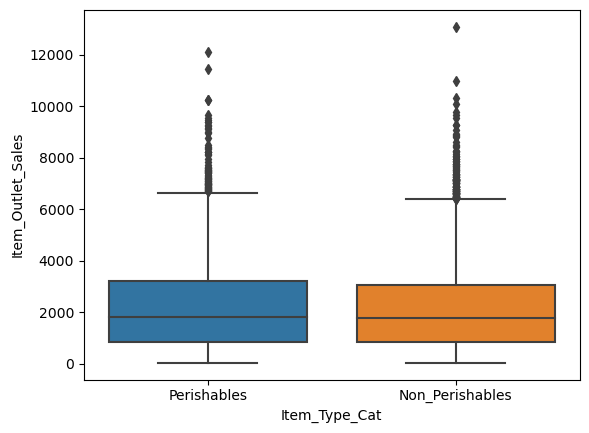

In [310]:
# Plot
sns.boxplot(x = "Item_Type_Cat", y = "Item_Outlet_Sales",
               data = combined)

In [311]:
# binning Outlet Identifer into high, low and average performing outlets
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [312]:
# Top 2 Outlets - OUT027, OUT013
# Bottom 2 - OUT010, OUT019

top2 = ["OUT027", "OUT013"]
bottom2 = ["OUT010", "OUT019"]

def outlet_class(x):
    if x in top2:
        return("High Performing")
    elif x in bottom2:
        return("Low Performing")
    else:
        return("Average Performing")

In [313]:
combined["Outlet_Class"]= combined.Outlet_Identifier.apply(outlet_class)

<AxesSubplot:xlabel='Outlet_Class', ylabel='Item_Outlet_Sales'>

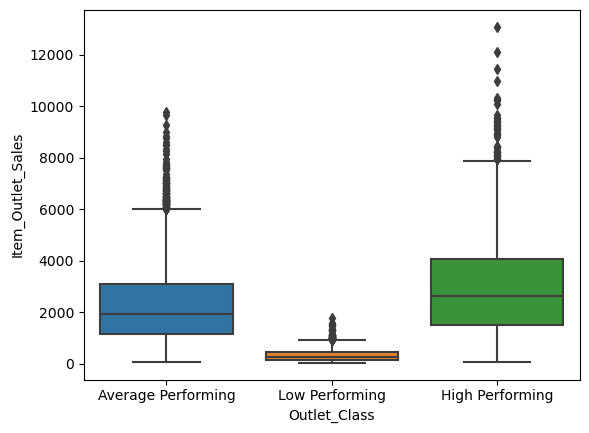

In [314]:
# plot
sns.boxplot(x = "Outlet_Class", y = "Item_Outlet_Sales",
           data = combined)

In [315]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_Cat,Outlet_Class
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Average Performing
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,Average Performing


In [316]:
# Creating price_per_unit
combined["price_per_unit"] = combined.Item_MRP/combined.Item_Weight

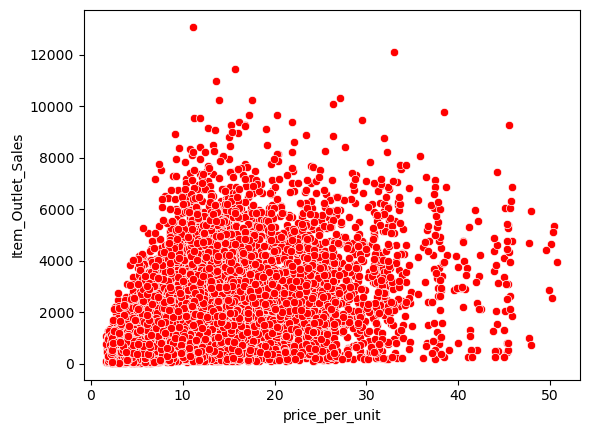

In [317]:
sns.scatterplot(combined.price_per_unit,
               combined.Item_Outlet_Sales, color = "red")
plt.show()

In [318]:
# Vintage of the outlet
combined['Vintage']= 2013 - combined.Outlet_Establishment_Year

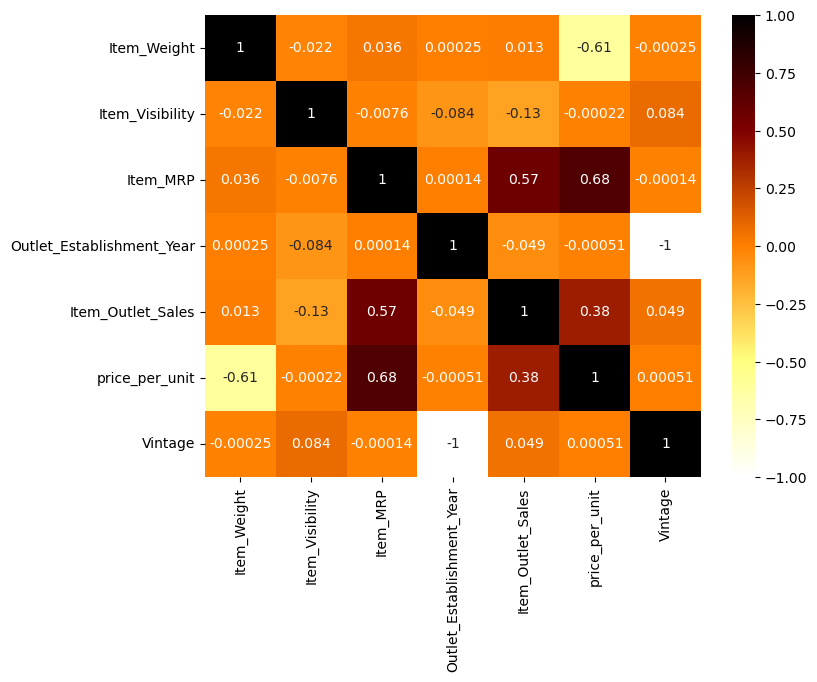

In [319]:
# Checking Correlation if it has improved or not
plt.figure(figsize=(8,6))
sns.heatmap(combined.corr(), annot = True, cmap = 'afmhot_r')
plt.show()

In [320]:
# Generating columns using frequency and target encoding, and other features as well
combined['magic1']= combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
combined['magic2']= combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('median')
combined['magic3']= combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('nunique')
combined['magic4']= combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('std')
combined['magic5']= combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('min')
combined['magic6']= combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('max')

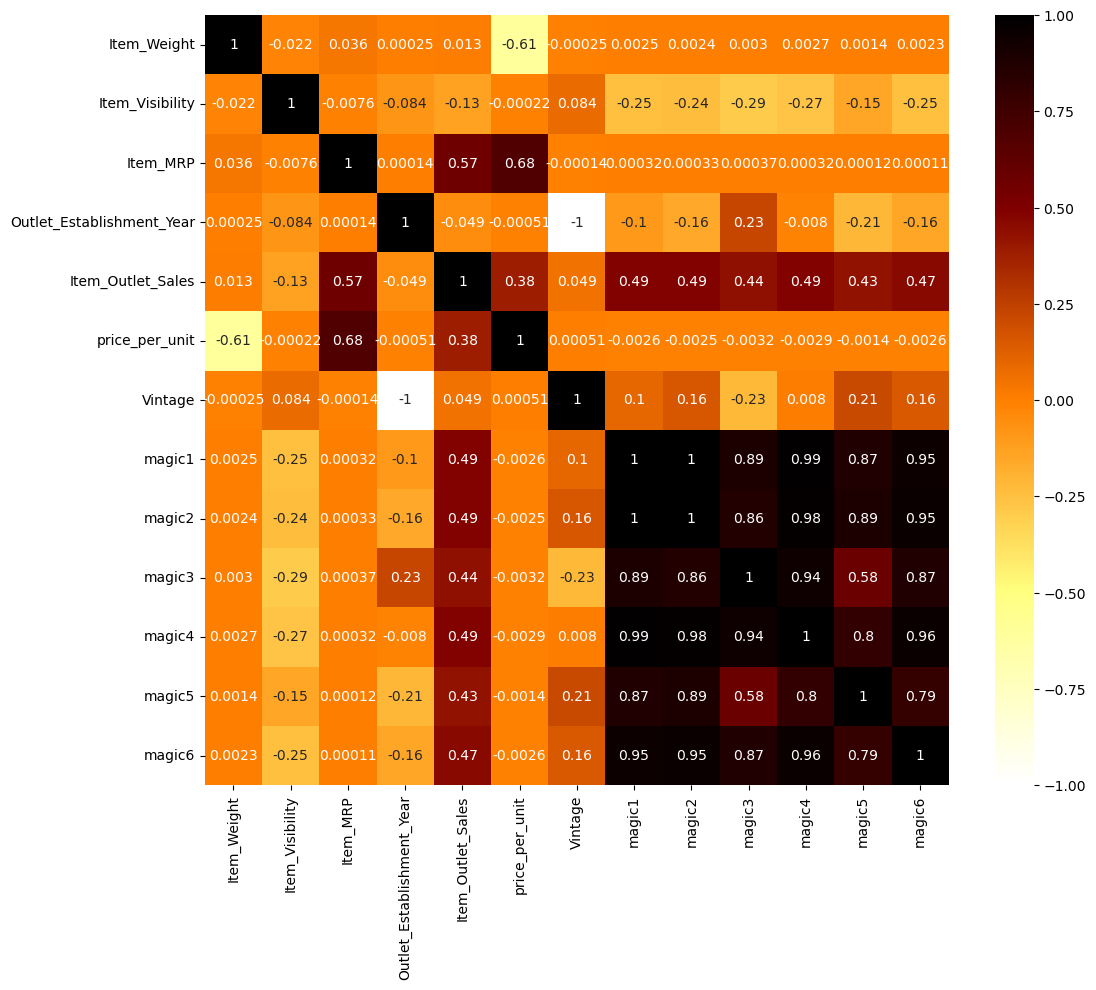

In [321]:
# Checking Correlation if it has improved or not
plt.figure(figsize=(12,10))
sns.heatmap(combined.corr(), annot = True, cmap = 'afmhot_r')
plt.show()

In [322]:
# Trying same with Item type
combined.groupby('Item_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [323]:
combined['magic7']= combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('mean')

In [324]:
combined.loc[:, ['magic7','Item_Outlet_Sales']].corr()

,magic7,Item_Outlet_Sales
magic7,1.000000,0.068843
Item_Outlet_Sales,0.068843,1.000000


Since the correlation is very weak, it is not useful and hence we will not try with item type.

In [325]:
del combined['magic7']

In [326]:
# Trying same with Outlet type
combined.groupby('Outlet_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [327]:
combined['magic7']= combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('mean')

In [328]:
combined.loc[:, ['magic7','Item_Outlet_Sales']].corr()

,magic7,Item_Outlet_Sales
magic7,1.000000,0.489464
Item_Outlet_Sales,0.489464,1.000000


Since the correlation is good, we will create rest all features with this.

In [329]:
# Generating columns using frequency and target encoding, and other features as well
combined['magic8']= combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('median')
combined['magic9']= combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('min')
combined['magic10']= combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('max')
combined['magic11']= combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('std')
combined['magic12']= combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('nunique')

In [330]:
# checking correlation
combined.loc[:, ['magic7','magic8', 'magic9', 'magic10', 'magic11', 'magic12', 'Item_Outlet_Sales']].corr()

,magic7,magic8,magic9,magic10,magic11,magic12,Item_Outlet_Sales
magic7,1.000000,0.998299,0.797615,0.954587,0.989893,0.287261,0.489464
magic8,0.998299,1.000000,0.828556,0.945835,0.979977,0.254348,0.488632
magic9,0.797615,0.828556,1.000000,0.628858,0.708220,-0.264982,0.390387
magic10,0.954587,0.945835,0.628858,1.000000,0.965733,0.554092,0.467234
magic11,0.989893,0.979977,0.708220,0.965733,1.000000,0.373020,0.484518
magic12,0.287261,0.254348,-0.264982,0.554092,0.373020,1.000000,0.140675
Item_Outlet_Sales,0.489464,0.488632,0.390387,0.467234,0.484518,0.140675,1.000000


In [331]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_Cat,Outlet_Class,price_per_unit,Vintage,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Average Performing,26.861204,14,2348.354635,1966.1074,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,Average Performing,8.153581,4,1995.498739,1655.1788,779,1375.932889,69.2432,6768.5228,1995.498739,1655.1788,69.2432,6768.5228,1375.932889,779
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,Average Performing,8.092457,14,2348.354635,1966.1074,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,Low Performing,9.484115,15,339.351662,250.3408,391,271.014855,33.2900,1775.6886,339.828500,256.9988,33.2900,1775.6886,260.851582,571
4,NCD19,8.93,Non Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,High Performing,6.031512,26,2298.995256,2050.6640,788,1533.531664,73.2380,10256.6490,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674


In [332]:
# Let's drop the features that we do not need 
new= combined.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [333]:
new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_Cat,Outlet_Class,price_per_unit,Vintage,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Average Performing,26.861204,14,2348.354635,1966.1074,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,Average Performing,8.153581,4,1995.498739,1655.1788,779,1375.932889,69.2432,6768.5228,1995.498739,1655.1788,69.2432,6768.5228,1375.932889,779
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,Average Performing,8.092457,14,2348.354635,1966.1074,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,Low Performing,9.484115,15,339.351662,250.3408,391,271.014855,33.2900,1775.6886,339.828500,256.9988,33.2900,1775.6886,260.851582,571
4,8.93,Non Edible,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,High Performing,6.031512,26,2298.995256,2050.6640,788,1533.531664,73.2380,10256.6490,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674


<a id="split"> </a>
## 7. Train Test Split

In [338]:
newtrain= new.loc[0: train.shape[0]-1, :]
newtest= new.loc[train.shape[0]:, :]

newtrain.shape, newtest.shape, train.shape, test.shape

((8523, 25), (5681, 25), (8523, 12), (5681, 11))

In [339]:
#X
X= newtrain.drop('Item_Outlet_Sales', axis=1)

#y
y= newtrain['Item_Outlet_Sales']

# Item Outlet Sales also to be dropped from test set
newtest= newtest.drop('Item_Outlet_Sales', axis=1)

<a id="statistic"> </a>
## 8. Statistical Analysis

In [340]:
import scipy.stats as stats

In [341]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Ids',
       'Item_Type_Cat', 'Outlet_Class', 'price_per_unit', 'Vintage', 'magic1',
       'magic2', 'magic3', 'magic4', 'magic5', 'magic6', 'magic7', 'magic8',
       'magic9', 'magic10', 'magic11', 'magic12'],
      dtype='object')

In [342]:
# Ho: That the variable has no relation with Sales.
# Ha: variable has a relation with the Sales. It means that variable contributes in predicting the sales.

In [343]:
# Lets perform two sample t test on numerical variables
nums= ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'price_per_unit', 'Vintage', 'magic1', 'magic2',
       'magic3', 'magic4', 'magic5', 'magic6', 'magic7', 'magic8', 'magic9',
       'magic10', 'magic11', 'magic12']
 
for i in nums:
    teststats, pvalue= stats.ttest_ind(newtrain.loc[:,i] , newtrain.Item_Outlet_Sales)
    print('Pvalue for',i,'is:', pvalue)

Pvalue for Item_Weight is: 0.0
Pvalue for Item_Visibility is: 0.0
Pvalue for Item_MRP is: 0.0
Pvalue for price_per_unit is: 0.0
Pvalue for Vintage is: 0.0
Pvalue for magic1 is: 0.9999999999999825
Pvalue for magic2 is: 3.1784715029457972e-49
Pvalue for magic3 is: 0.0
Pvalue for magic4 is: 0.0
Pvalue for magic5 is: 0.0
Pvalue for magic6 is: 0.0
Pvalue for magic7 is: 1.0
Pvalue for magic8 is: 3.389157119244379e-48
Pvalue for magic9 is: 0.0
Pvalue for magic10 is: 0.0
Pvalue for magic11 is: 0.0
Pvalue for magic12 is: 3.3373511221478586e-18


**Inference:**
Since the pvalue of Magic1 and Magic7 is greater than 0.05, therefore we fail to reject the null hypothesis and conclude that these two variables that we created has no relation with sales and are not contributing in predicting the sales.

In [344]:
# Dropping Magic1 and Magic7
X.drop(['magic1', 'magic7'], axis = 1, inplace = True)
newtest.drop(['magic1', 'magic7'], axis = 1, inplace = True)

In [345]:
newtrain.select_dtypes(include = "object").columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Ids', 'Item_Type_Cat', 'Outlet_Class'],
      dtype='object')

In [346]:
# Ho: That the variable has no relation with Sales.
# Ha: variable has a relation with the Sales. It means that variable contributes in predicting the sales.

In [347]:
# Checking Item Fat Content & Others categorical variables(we will apply anova)

import statsmodels.formula.api as sfa

model = sfa.ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+\
Outlet_Location_Type+Outlet_Type+Item_Ids+Outlet_Class", data = newtrain).fit()

In [348]:
from statsmodels.stats.anova import anova_lm

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,2.079075,1.251093e-01
Outlet_Size,2.0,1.184389e+09,5.921943e+08,267.612040,1.928574e-113
Outlet_Location_Type,2.0,1.419529e+09,7.097646e+08,320.741951,5.043600e-135
Outlet_Type,3.0,3.343020e+09,1.114340e+09,503.569119,3.009950e-301
Item_Ids,2.0,2.662183e+07,1.331092e+07,6.015190,2.451774e-03
Outlet_Class,2.0,1.515587e+06,7.577935e+05,0.342446,7.100411e-01
Residual,8512.0,1.883607e+10,2.212884e+06,NaN,NaN


**Inference**
Since the pvalue of all categorical variables is less than 0.05, we reject the null hypothesis and conclude that all variables have a relation with sales and contribute in predicting the sales.

<a id='scaling'> </a>
## 9. Scaling/Transformation

In [349]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Ids,Item_Type_Cat,Outlet_Class,price_per_unit,Vintage,magic2,magic3,magic4,magic5,magic6,magic8,magic9,magic10,magic11,magic12
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,FD,Perishables,Average Performing,26.861204,14,1966.1074,785,1513.289464,111.8544,7646.0472,1990.7420,73.2380,10256.6490,1515.965558,2674
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,DR,Non_Perishables,Average Performing,8.153581,4,1655.1788,779,1375.932889,69.2432,6768.5228,1655.1788,69.2432,6768.5228,1375.932889,779
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,FD,Perishables,Average Performing,8.092457,14,1966.1074,785,1513.289464,111.8544,7646.0472,1990.7420,73.2380,10256.6490,1515.965558,2674
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,FD,Perishables,Low Performing,9.484115,15,250.3408,391,271.014855,33.2900,1775.6886,256.9988,33.2900,1775.6886,260.851582,571
4,8.93,Non Edible,0.009780,53.8614,High,Tier 3,Supermarket Type1,NC,Non_Perishables,High Performing,6.031512,26,2050.6640,788,1533.531664,73.2380,10256.6490,1990.7420,73.2380,10256.6490,1515.965558,2674


In [350]:
from sklearn.preprocessing import StandardScaler

In [351]:
cols= X.select_dtypes(include=np.number).columns
cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'price_per_unit',
       'Vintage', 'magic2', 'magic3', 'magic4', 'magic5', 'magic6', 'magic8',
       'magic9', 'magic10', 'magic11', 'magic12'],
      dtype='object')

In [352]:
sc= StandardScaler()
for i in cols:
    X.loc[:, i] = sc.fit_transform(pd.DataFrame(X.loc[:, i]))

for i in cols:
    newtest.loc[:,i]= sc.fit_transform(pd.DataFrame(newtest.loc[:,i]))

In [353]:
X.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Ids,Item_Type_Cat,Outlet_Class,price_per_unit,Vintage,magic2,magic3,magic4,magic5,magic6,magic8,magic9,magic10,magic11,magic12
0,-0.769246,Low Fat,-1.081039,1.747454,Medium,Tier 1,Supermarket Type1,FD,Perishables,Average Performing,1.761951,-0.139541,0.110162,0.345824,0.219806,0.058537,-0.23275,0.138096,-0.231091,0.362200,0.223528,0.724939
1,-1.496813,Regular,-1.016230,-1.489023,Medium,Tier 3,Supermarket Type2,DR,Non_Perishables,Average Performing,-0.569097,-1.334103,-0.293273,0.302168,-0.065221,-0.704931,-0.51927,-0.298724,-0.302278,-0.739322,-0.067333,-1.306718


<a id="encoding"> </a>
## 10. Encoding categorical variables

In [354]:
# Doing Label Encoding in outlet size since it is an ordinal variable
X.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [355]:
size = {"Small":1, "Medium":2, "High":3}

In [356]:
X['Outlet_Size']= X.Outlet_Size.map(size)
newtest['Outlet_Size']= newtest.Outlet_Size.map(size)

In [357]:
# Doing Label Encoding in outlet class since it is also ordinal
X.Outlet_Class.unique()

array(['Average Performing', 'Low Performing', 'High Performing'],
      dtype=object)

In [358]:
classs= {'Low Performing':1, 'Average Performing':2, 'High Performing':3}

In [359]:
X.Outlet_Class= X.Outlet_Class.map(classs)
newtest.Outlet_Class= newtest.Outlet_Class.map(classs)

In [360]:
# Greating Dummies of rest categorical variables
X= pd.get_dummies(X, drop_first= True)
newtest= pd.get_dummies(newtest, drop_first= True)

In [361]:
X.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Class,price_per_unit,Vintage,magic2,magic3,magic4,magic5,magic6,magic8,magic9,magic10,magic11,magic12,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,Item_Type_Cat_Perishables
0,-0.769246,-1.081039,1.747454,2,2,1.761951,-0.139541,0.110162,0.345824,0.219806,0.058537,-0.23275,0.138096,-0.231091,0.362200,0.223528,0.724939,0,0,0,0,1,0,0,1,0,1
1,-1.496813,-1.016230,-1.489023,2,2,-0.569097,-1.334103,-0.293273,0.302168,-0.065221,-0.704931,-0.51927,-0.298724,-0.302278,-0.739322,-0.067333,-1.306718,0,1,0,1,0,1,0,0,0,0


In [362]:
newtest.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Class,price_per_unit,Vintage,magic2,magic3,magic4,magic5,magic6,magic8,magic9,magic10,magic11,magic12,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,Item_Type_Cat_Perishables
8523,1.734064,-1.247634,-0.536555,2,2,-0.949982,-0.139891,0.109888,0.345803,0.219616,0.058144,-0.232874,0.137818,-0.23137,0.36198,0.223337,0.725036,0,0,0,0,1,0,0,1,0,0
8524,-0.938845,-0.624550,-0.868937,1,2,-0.295361,-1.095512,0.160410,0.287602,0.297391,0.630535,0.426125,0.137818,-0.23137,0.36198,0.223337,0.725036,0,1,1,0,1,0,0,1,0,1


In [363]:
# Drop the Vars - 8, 9...12

newx = X.drop(['magic8', 'magic9', 'magic10', 
               'magic11', 'magic12'], axis = 1)
new_test = newtest.drop(['magic8', 'magic9', 
                         'magic10', 'magic11', 'magic12'], axis = 1)

In [364]:
newx.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Class,price_per_unit,Vintage,magic2,magic3,magic4,magic5,magic6,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,Item_Type_Cat_Perishables
0,-0.769246,-1.081039,1.747454,2,2,1.761951,-0.139541,0.110162,0.345824,0.219806,0.058537,-0.232750,0,0,0,0,1,0,0,1,0,1
1,-1.496813,-1.016230,-1.489023,2,2,-0.569097,-1.334103,-0.293273,0.302168,-0.065221,-0.704931,-0.519270,0,1,0,1,0,1,0,0,0,0
2,0.995858,-1.066741,0.010040,2,2,-0.576713,-0.139541,0.110162,0.345824,0.219806,0.058537,-0.232750,0,0,0,0,1,0,0,1,0,1
3,1.361794,-1.045193,0.660050,1,1,-0.403307,-0.020085,-2.116073,-2.520890,-2.358026,-1.349107,-2.149477,0,1,0,1,0,0,0,1,0,1
4,-0.848890,-1.206757,-1.399220,3,3,-0.833516,1.293934,0.219876,0.367651,0.261811,-0.633356,0.619635,1,0,0,1,1,0,0,0,1,0


<a id="model"> </a>
## 11. Model Building
* Linear Model
* Random Forest Model
* Gradient Boosting
* XGboost

In [365]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Initiate the KFold Instance 
kfold= KFold(n_splits= 10, shuffle= True, random_state= 10 )

##### Linear Regression

In [505]:
lr= LinearRegression()
pred = []

for train_index, test_index in kfold.split(newx, y): 
    xtrain = newx.iloc[train_index] 
    ytrain = y.iloc[train_index] 
    pred.append(lr.fit(xtrain, ytrain).predict(new_test))

In [ ]:
predicted = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

 submission= pd.DataFrame({'Item_Identifier': test.Item_Identifier,
                          'Outlet_Identifier': test.Outlet_Identifier,
                          'Item_Outlet_Sales': predicted})

In [ ]:
# Exporting it outside
submission.to_csv("bigmart_lr.csv", index = False) 

The RMSLE value that i got after submitting is: 1192

##### Random Forest

In [ ]:
rf = RandomForestRegressor()
pred_rf = []

for train_index, test_index in kfold.split(newx, y): 
    xtrain = newx.iloc[train_index]
    ytrain = y.iloc[train_index] 
    pred_rf.append(rf.fit(xtrain, ytrain).predict(new_test))

In [ ]:
predicted = np.abs(pd.DataFrame(pred_rf).T.mean(axis = 1))

submission= pd.DataFrame({'Item_Identifier': test.Item_Identifier,
                          'Outlet_Identifier': test.Outlet_Identifier,
                          'Item_Outlet_Sales': predicted})

In [ ]:
# Exporting it outside
submission.to_csv("bigmart_rf.csv", index = False) 

The RMSLE value that i got after submitting is: 1190.3

##### Gradient Boosting

In [243]:
gbm = GradientBoostingRegressor()
pred_gbm = []

for train_index, test_index in kfold.split(newx, y): 
    xtrain = newx.iloc[train_index]
    ytrain = y.iloc[train_index] 
    pred_gbm.append(gbm.fit(xtrain, ytrain).predict(new_test))

In [244]:
predicted = np.abs(pd.DataFrame(pred_gbm).T.mean(axis = 1))

submission= pd.DataFrame({'Item_Identifier': test.Item_Identifier,
                          'Outlet_Identifier': test.Outlet_Identifier,
                          'Item_Outlet_Sales': predicted})

In [133]:
# Exporting it outside
submission.to_csv("bigmart_GBM.csv", index = False) 

The RMSLE value that i got after submitting is: 1151.52

<AxesSubplot:>

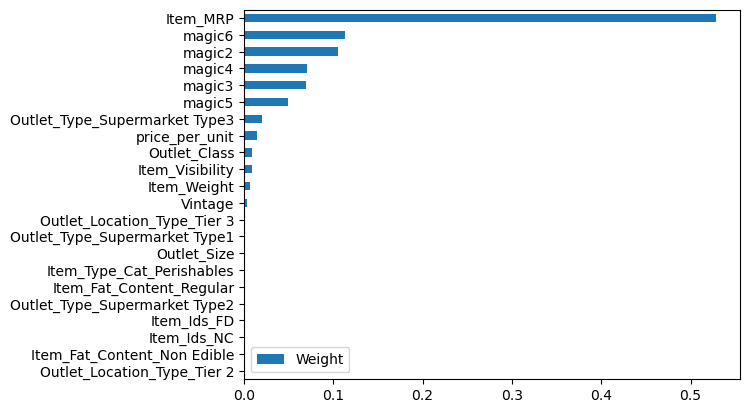

In [262]:
pd.DataFrame(gbm.feature_importances_, index = xgb.feature_names_in_, 
            columns =["Weight"]).sort_values(by = "Weight", ascending = True).\
plot(kind = "barh")

##### XGBoost

In [266]:
xgb = XGBRegressor()
pred_xgb = []

for train_index, test_index in kfold.split(newx, y): 
    xtrain = newx.iloc[train_index]
    ytrain = y.iloc[train_index] 
    pred_xgb.append(xgb.fit(xtrain, ytrain).predict(new_test))

In [267]:
predicted = np.abs(pd.DataFrame(pred_xgb).T.mean(axis = 1))

submission= pd.DataFrame({'Item_Identifier': test.Item_Identifier,
                          'Outlet_Identifier': test.Outlet_Identifier,
                          'Item_Outlet_Sales': predicted})

In [268]:
# Exporting it outside
submission.to_csv("bigmart_XGB.csv", index = False) 

The RMSLE value that i got after submitting is: 1199.24.

### Model Tuning

Gradient Boosting is giving the lowest root mean squared value, we will further tune its hyperparameters to obtain the best fit model.

**Let's Tune the hyperparameters**

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10)}

# instantiate the 'XGBClassifier' 
gbm_model = GradientBoostingRegressor()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gbm_grid = GridSearchCV(estimator = gbm_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
gbm_grid.fit(newx, y)

# get the best parameters
print('Best parameters for XGBoost classifier: ', gbm_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 0.1, 'max_depth': 3} 



#### Let's Build the model using the tuned hyperparameters.

In [366]:
gbm_grid_model = GradientBoostingRegressor(learning_rate = 0.1,
                               max_depth = 3)

gbm_model = gbm_grid_model.fit(newx, y)

predicted= np.abs(gbm_model.predict(new_test))

In [367]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

In [281]:
submission.to_csv("Bigmart_GBM_Tuned.csv", index = False) 

<AxesSubplot:>

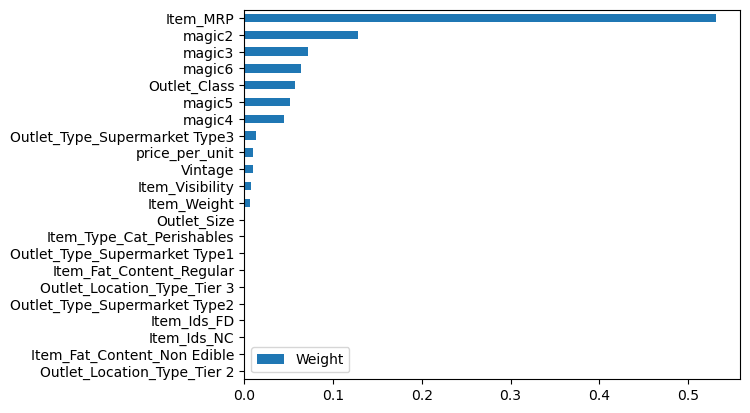

In [368]:
pd.DataFrame(gbm_model.feature_importances_, index = gbm_model.feature_names_in_, 
            columns =["Weight"]).sort_values(by = "Weight", ascending = True).\
plot(kind = "barh")